# Invocación para Pandas

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Asegúrate de especificar el separador correcto, que en este caso es ';'
df = pd.read_csv("RESULTADOS.csv", delimiter=';')

# Ahora vamos a visualizar el DataFrame para verificar que se ha cargado correctamente
df

,RANDOM,MergeSort,QuickSort,StandardSort,RANDOM_MALOS,BubbleSort,ORDENADO,MergeSort.1,StandardSort.1,ORDENADO_MALOS,...,MergeSort.2,QuickSort.2,StandardSort.2,SEMIORDERED_MALO,BubbleSort.2,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,2000000,889,387,471,2000,11,2000000,630,266,2000,...,828,571,436,2000,9,NaN,NaN,NaN,NaN,NaN
2,4000000,1822,914,977,4000,48,4000000,1279,570,4000,...,1686,889,879,4000,38,NaN,NaN,NaN,NaN,NaN
3,6000000,2792,1265,1506,6000,108,6000000,1969,988,6000,...,2568,1660,1337,6000,83,NaN,NaN,NaN,NaN,NaN
4,8000000,3814,1723,2258,8000,209,8000000,2674,1181,8000,...,3541,2365,1801,8000,148,NaN,NaN,NaN,NaN,NaN
5,10000000,4757,2154,2587,10000,283,10000000,3378,1670,10000,...,4479,2778,2342,10000,231,NaN,NaN,NaN,NaN,NaN
6,12000000,5710,2582,3130,12000,429,12000000,3983,1872,12000,...,5573,3158,2979,12000,338,NaN,NaN,NaN,NaN,NaN
7,14000000,6784,3035,3725,14000,666,14000000,4800,2356,14000,...,6404,3305,3209,14000,451,NaN,NaN,NaN,NaN,NaN
8,16000000,7731,3828,4504,16000,767,16000000,5367,2489,16000,...,7406,4143,3813,16000,630,NaN,NaN,NaN,NaN,NaN
9,18000000,8740,4206,5129,18000,969,18000000,6076,2763,18000,...,8273,4586,4441,18000,786,NaN,NaN,NaN,NaN,NaN


## Análisis de Sorts para datasets random:

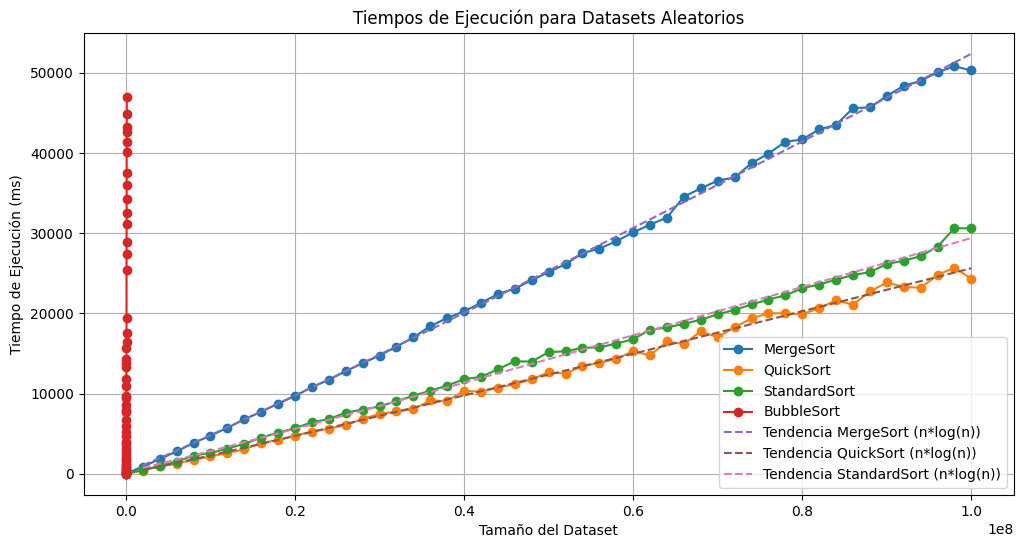

<Figure size 640x480 with 0 Axes>

In [15]:
from scipy.optimize import curve_fit

# Función para modelar n*log(n)
def nlogn(x, a, b):
    return a * x * np.log(x) + b

# Cargar los datos desde un archivo CSV

# Preparar datos para ajuste (filtrar ceros porque log(0) es indefinido)
x_data = df['RANDOM'][df['RANDOM'] > 0]
y_data_ms = df['MergeSort'][df['RANDOM'] > 0]
y_data_qs = df['QuickSort'][df['RANDOM'] > 0]
y_data_ss = df['StandardSort'][df['RANDOM'] > 0]

# Ajustar los modelos
params_ms, _ = curve_fit(nlogn, x_data, y_data_ms, maxfev=10000)
params_qs, _ = curve_fit(nlogn, x_data, y_data_qs, maxfev=10000)
params_ss, _ = curve_fit(nlogn, x_data, y_data_ss, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales
plt.plot(df['RANDOM'], df['MergeSort'], label='MergeSort', marker='o')
plt.plot(df['RANDOM'], df['QuickSort'], label='QuickSort', marker='o')
plt.plot(df['RANDOM'], df['StandardSort'], label='StandardSort', marker='o')
plt.plot(df['RANDOM_MALOS'], df['BubbleSort'], label='BubbleSort', marker='o')

# Agregar las líneas de tendencia n*log(n)
plt.plot(x_data, nlogn(x_data, *params_ms), label='Tendencia MergeSort (n*log(n))', linestyle='--')
plt.plot(x_data, nlogn(x_data, *params_qs), label='Tendencia QuickSort (n*log(n))', linestyle='--')
plt.plot(x_data, nlogn(x_data, *params_ss), label='Tendencia StandardSort (n*log(n))', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución para Datasets Aleatorios')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
plt.savefig("Aleatorios.jpg")


<Figure size 1000x600 with 0 Axes>

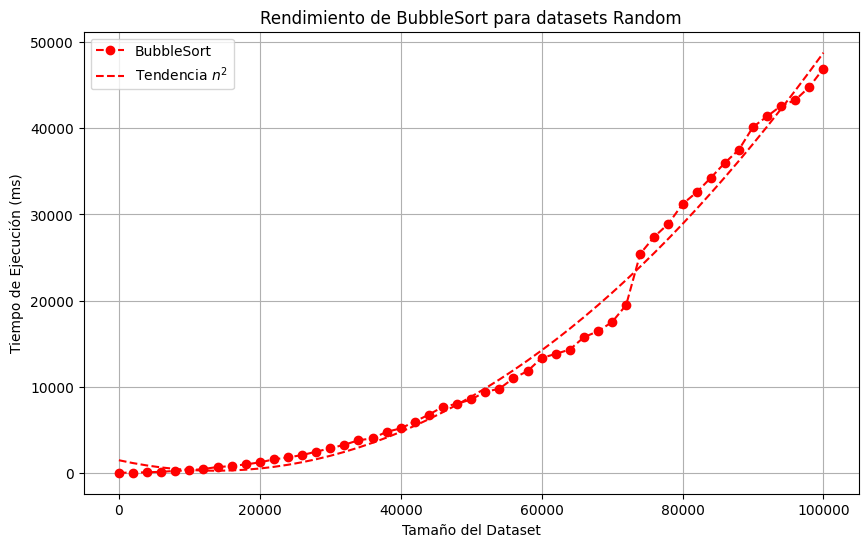

In [16]:
plt.figure(figsize=(10, 6))

# Graficar el tiempo de ejecución de BubbleSort para los datos aleatorios y peores casos

# Crear la figura y establecer tamaño
plt.figure(figsize=(10, 6))

# Graficar el tiempo de ejecución de BubbleSort para los datos peores casos
plt.plot(df['RANDOM_MALOS'], df['BubbleSort'], label='BubbleSort', marker='o', linestyle='--', color='red')

# Añadir títulos y etiquetas
plt.title('Rendimiento de BubbleSort para datasets Random')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')

# Calcular y agregar la línea de tendencia cuadrática
z = np.polyfit(df['RANDOM_MALOS'], df['BubbleSort'], 2)
p = np.poly1d(z)
plt.plot(df['RANDOM_MALOS'], p(df['RANDOM_MALOS']), "r--", label='Tendencia $n^2$')

# Añadir leyenda y cuadrícula
plt.legend()
plt.grid(True)
plt.savefig("aleatorios.jpg")
# Mostrar el gráfico
plt.show()



## Análisis para Sorts en datasets ordenados

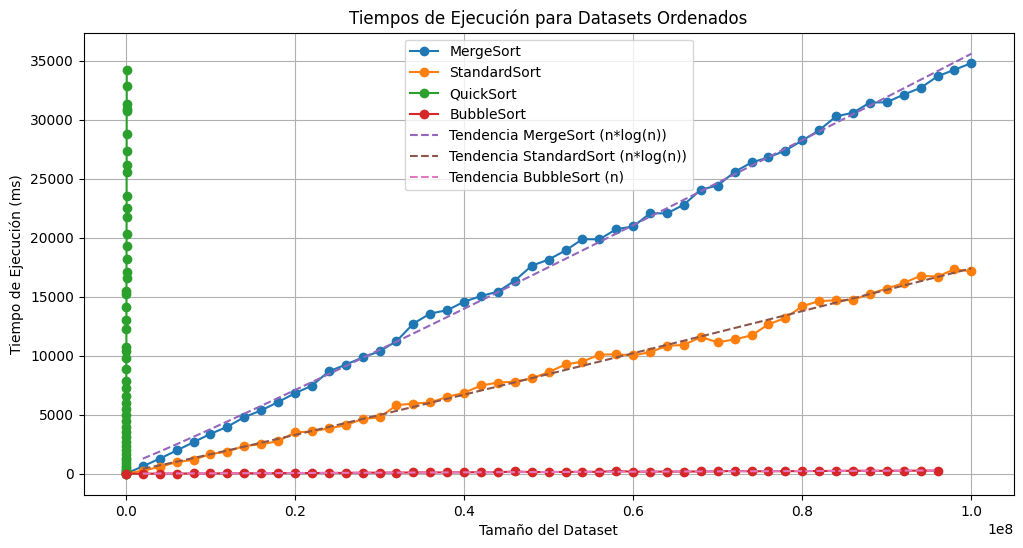

In [17]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Función para modelar n*log(n) y lineal
def nlogn(x, a, b):
    return a * x * np.log(x) + b

def linear(x, a, b):
    return a * x + b

# Filtrar datos que no contengan NaNs o Infs
valid_mask_bs = np.isfinite(df['BubbleSort.1'])  # Crear una máscara para BubbleSort sin infs o NaNs

# Preparar datos filtrados para ajuste para ORDENADO
x_data_ordenado = df['ORDENADO'][df['ORDENADO'] > 0]
y_data_ms_ordenado = df['MergeSort.1'][df['ORDENADO'] > 0]
y_data_ss_ordenado = df['StandardSort.1'][df['ORDENADO'] > 0]
y_data_bs_ordenado = df['BubbleSort.1'][valid_mask_bs & (df['ORDENADO'] > 0)]  # Filtrar los datos de BubbleSort

# Ajustar los modelos para datos ordenados
params_ms_ordenado, _ = curve_fit(nlogn, x_data_ordenado, y_data_ms_ordenado, maxfev=10000)
params_ss_ordenado, _ = curve_fit(nlogn, x_data_ordenado, y_data_ss_ordenado, maxfev=10000)
params_bs_ordenado, _ = curve_fit(linear, x_data_ordenado[valid_mask_bs], y_data_bs_ordenado, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para datos ordenados
plt.plot(df['ORDENADO'], df['MergeSort.1'], label='MergeSort', marker='o')
plt.plot(df['ORDENADO'], df['StandardSort.1'], label='StandardSort', marker='o')
plt.plot(df['ORDENADO_MALOS'], df['QuickSort.1'], label='QuickSort', marker='o')
plt.plot(df['ORDENADO'], df['BubbleSort.1'], label='BubbleSort', marker='o')

# Agregar las líneas de tendencia n*log(n) para los datos ordenados
plt.plot(x_data_ordenado, nlogn(x_data_ordenado, *params_ms_ordenado), label='Tendencia MergeSort (n*log(n))', linestyle='--')
plt.plot(x_data_ordenado, nlogn(x_data_ordenado, *params_ss_ordenado), label='Tendencia StandardSort (n*log(n))', linestyle='--')

# Agregar la línea de tendencia lineal para BubbleSort
plt.plot(x_data_ordenado[valid_mask_bs], linear(x_data_ordenado[valid_mask_bs], *params_bs_ordenado), label='Tendencia BubbleSort (n)', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución para Datasets Ordenados')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()



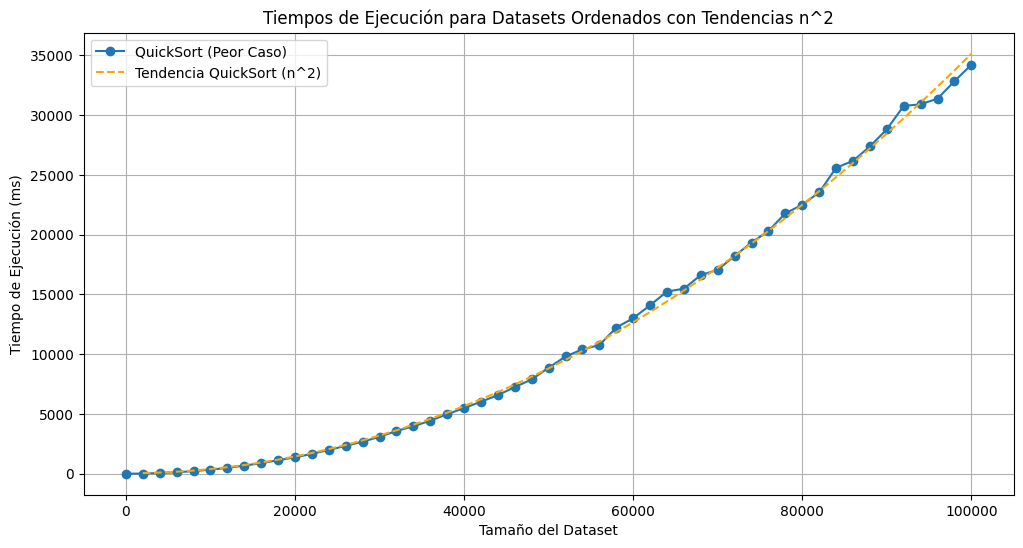

In [18]:
from scipy.optimize import curve_fit

# Función para modelar n^2
def nsquared(x, a, b):
    return a * (x**2) + b

# Preparar datos para ajuste para ORDENADO_MALOS (para QuickSort y BubbleSort)
x_data_ordenado_malos = df['ORDENADO_MALOS'][df['ORDENADO_MALOS'] > 0]
y_data_qs_ordenado_malos = df['QuickSort.1'][df['ORDENADO_MALOS'] > 0]

# Ajustar los modelos para datos ordenados (peores casos)
params_qs_ordenado_malos, _ = curve_fit(nsquared, x_data_ordenado_malos, y_data_qs_ordenado_malos, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para datos ordenados (peores casos)
plt.plot(df['ORDENADO_MALOS'], df['QuickSort.1'], label='QuickSort (Peor Caso)', marker='o')

# Agregar las líneas de tendencia n^2 para los datos ordenados (peores casos)
plt.plot(x_data_ordenado_malos, nsquared(x_data_ordenado_malos, *params_qs_ordenado_malos), label='Tendencia QuickSort (n^2)', linestyle='--', color='orange')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución para Datasets Ordenados con Tendencias n^2')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## Análisis para Sorts en datasets Semi Ordenados

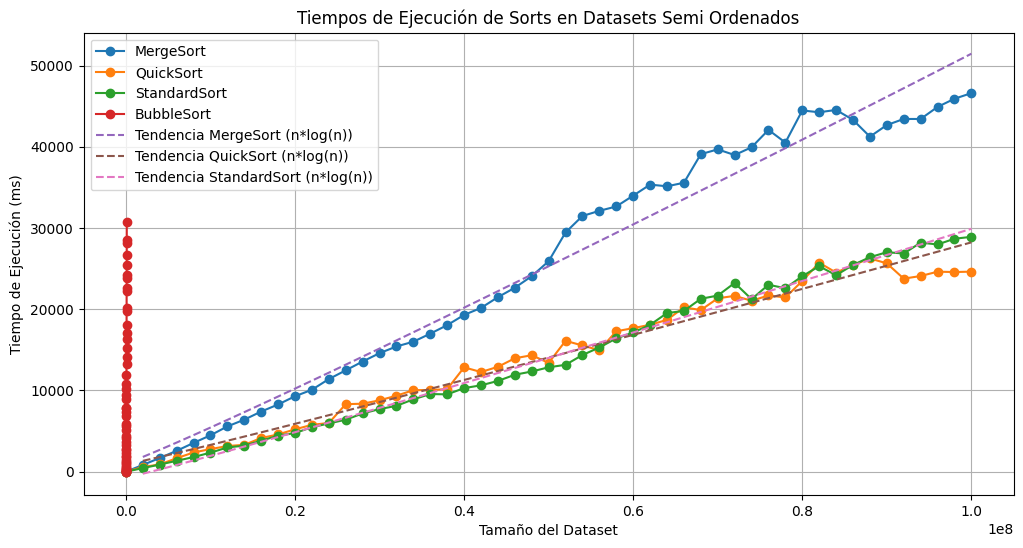

In [19]:
from scipy.optimize import curve_fit

# Función para modelar n*log(n)
def nlogn(x, a, b):
    return a * x * np.log(x) + b

# Preparar datos para ajuste para SEMI_ORDENADO
x_data_semi_ordenado = df['SEMI_ORDENADO'][df['SEMI_ORDENADO'] > 0]
y_data_ms_semi_ordenado = df['MergeSort.2'][df['SEMI_ORDENADO'] > 0]
y_data_qs_semi_ordenado = df['QuickSort.2'][df['SEMI_ORDENADO'] > 0]
y_data_ss_semi_ordenado = df['StandardSort.2'][df['SEMI_ORDENADO'] > 0]

# Ajustar los modelos para datos semi ordenados
params_ms_semi_ordenado, _ = curve_fit(nlogn, x_data_semi_ordenado, y_data_ms_semi_ordenado, maxfev=10000)
params_qs_semi_ordenado, _ = curve_fit(nlogn, x_data_semi_ordenado, y_data_qs_semi_ordenado, maxfev=10000)
params_ss_semi_ordenado, _ = curve_fit(nlogn, x_data_semi_ordenado, y_data_ss_semi_ordenado, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para datos semi ordenados
plt.plot(df['SEMI_ORDENADO'], df['MergeSort.2'], label='MergeSort', marker='o')
plt.plot(df['SEMI_ORDENADO'], df['QuickSort.2'], label='QuickSort', marker='o')
plt.plot(df['SEMI_ORDENADO'], df['StandardSort.2'], label='StandardSort', marker='o')
plt.plot(df['SEMIORDERED_MALO'], df['BubbleSort.2'], label='BubbleSort', marker='o')

# Agregar las líneas de tendencia n*log(n) para los datos semi ordenados
plt.plot(x_data_semi_ordenado, nlogn(x_data_semi_ordenado, *params_ms_semi_ordenado), label='Tendencia MergeSort (n*log(n))', linestyle='--')
plt.plot(x_data_semi_ordenado, nlogn(x_data_semi_ordenado, *params_qs_semi_ordenado), label='Tendencia QuickSort (n*log(n))', linestyle='--')
plt.plot(x_data_semi_ordenado, nlogn(x_data_semi_ordenado, *params_ss_semi_ordenado), label='Tendencia StandardSort (n*log(n))', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución de Sorts en Datasets Semi Ordenados')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


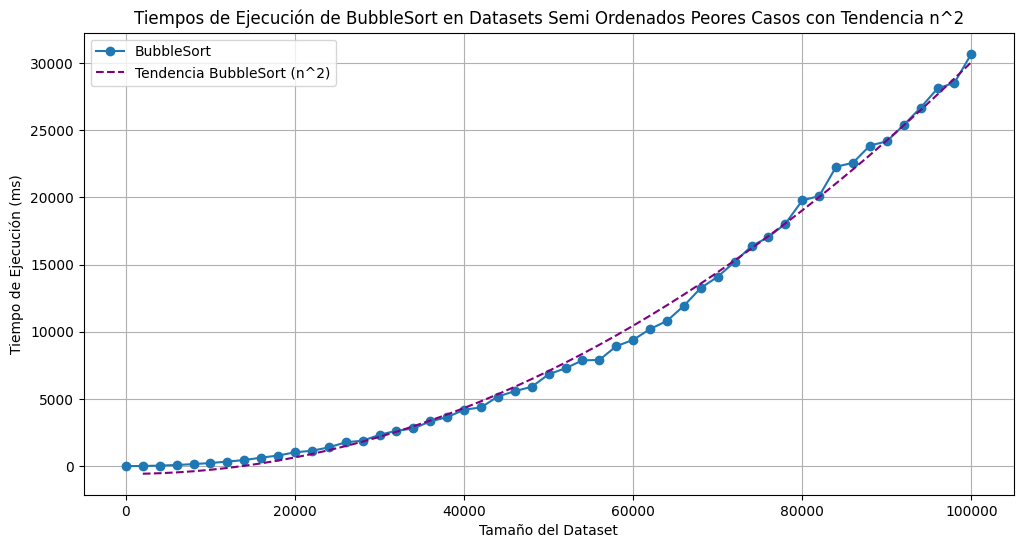

In [20]:
from scipy.optimize import curve_fit

# Función para modelar n^2
def nsquared(x, a, b):
    return a * (x**2) + b

# Preparar datos para ajuste para SEMIORDERED_MALO (datos semi ordenados peores casos)
x_data_semi_malo = df['SEMIORDERED_MALO'][df['SEMIORDERED_MALO'] > 0]
y_data_bs_semi_malo = df['BubbleSort.2'][df['SEMIORDERED_MALO'] > 0]

# Ajustar el modelo para BubbleSort en datos semi ordenados (peores casos)
params_bs_semi_malo, _ = curve_fit(nsquared, x_data_semi_malo, y_data_bs_semi_malo, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar el tiempo de ejecución original para BubbleSort en datos semi ordenados (peores casos)
plt.plot(df['SEMIORDERED_MALO'], df['BubbleSort.2'], label='BubbleSort', marker='o')

# Agregar la línea de tendencia n^2 para BubbleSort
plt.plot(x_data_semi_malo, nsquared(x_data_semi_malo, *params_bs_semi_malo), label='Tendencia BubbleSort (n^2)', linestyle='--', color='purple')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución de BubbleSort en Datasets Semi Ordenados Peores Casos con Tendencia n^2')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## QUICKSORT

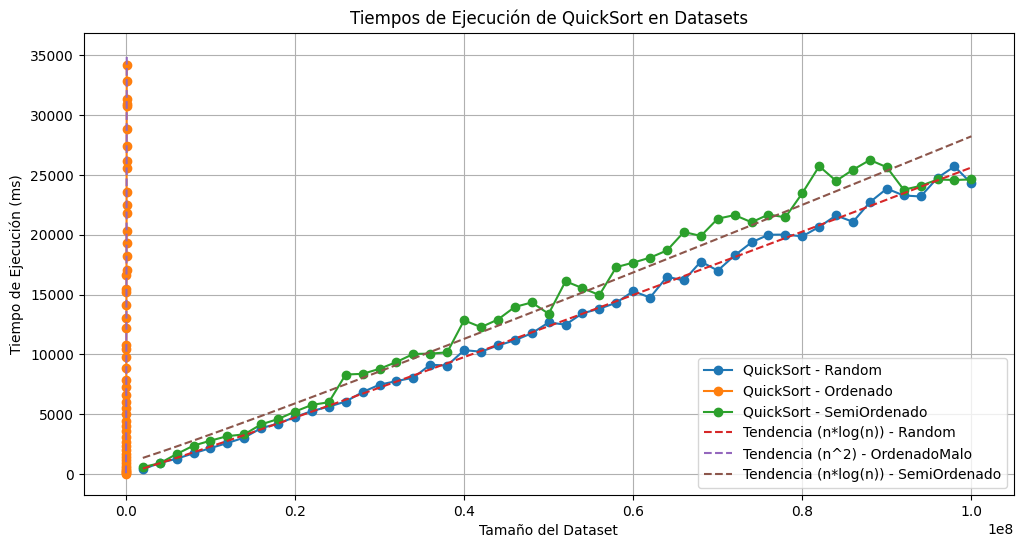

In [21]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función para modelar n*log(n)
def nlogn(x, a, b):
    return a * x * np.log(x) + b

# Función para modelar n^2
def n_squared(x, a, b):
    return a * x**2 + b

# Preparar datos para ajuste
x_data_random = df['RANDOM'][df['RANDOM'] > 0]
x_data_ordenado = df['ORDENADO_MALOS'][df['ORDENADO_MALOS'] > 0]
x_data_semiordenado = df['SEMI_ORDENADO'][df['SEMI_ORDENADO'] > 0]

y_random = df['QuickSort'][df['RANDOM'] > 0]
y_ordenado = df['QuickSort.1'][df['ORDENADO_MALOS'] > 0]
y_semiordenado = df['QuickSort.2'][df['SEMI_ORDENADO'] > 0]

# Ajustar los modelos para los datos
params_random, _ = curve_fit(nlogn, x_data_random, y_random, maxfev=10000)
params_ordenado, _ = curve_fit(nlogn, x_data_ordenado, y_ordenado, maxfev=10000)
params_semiordenado, _ = curve_fit(nlogn, x_data_semiordenado, y_semiordenado, maxfev=10000)

# Ajustar el modelo n^2 para los datos de ORDENADO_MALOS
params_ordenado_malo, _ = curve_fit(n_squared, x_data_ordenado, y_ordenado, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para QuickSort en los datasets
plt.plot(x_data_random, y_random, label='QuickSort - Random', marker='o')
plt.plot(x_data_ordenado, y_ordenado, label='QuickSort - Ordenado', marker='o')
plt.plot(x_data_semiordenado, y_semiordenado, label='QuickSort - SemiOrdenado', marker='o')

# Agregar las líneas de tendencia
plt.plot(x_data_random, nlogn(x_data_random, *params_random), label='Tendencia (n*log(n)) - Random', linestyle='--')
plt.plot(x_data_ordenado, n_squared(x_data_ordenado, *params_ordenado_malo), label='Tendencia (n^2) - OrdenadoMalo', linestyle='--')
plt.plot(x_data_semiordenado, nlogn(x_data_semiordenado, *params_semiordenado), label='Tendencia (n*log(n)) - SemiOrdenado', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución de QuickSort en Datasets')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## MERGESORT

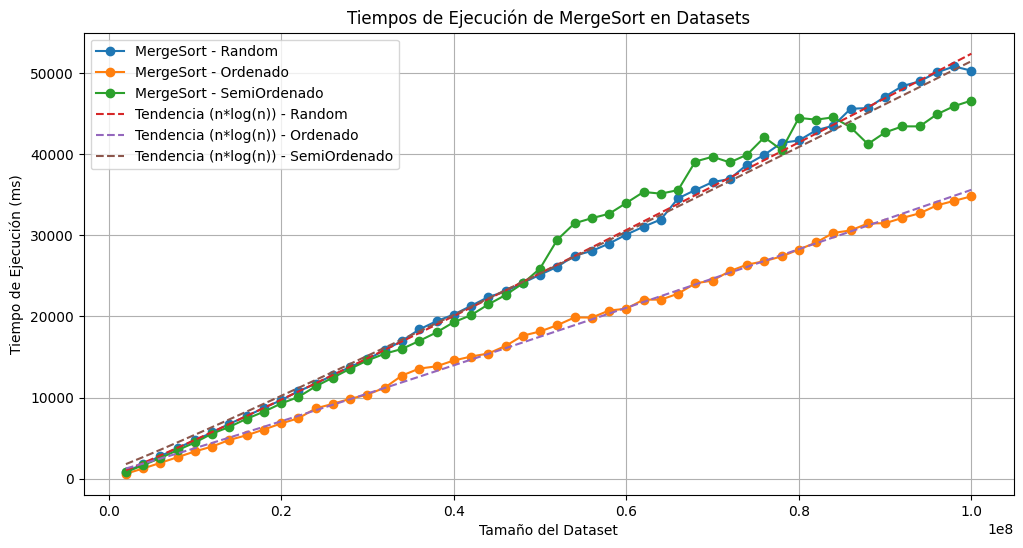

In [22]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función para modelar n*log(n)
def nlogn(x, a, b):
    return a * x * np.log(x) + b

# Preparar datos para ajuste para MergeSort
x_data_random = df['RANDOM'][df['RANDOM'] > 0]
x_data_ordenado = df['ORDENADO'][df['ORDENADO'] > 0]
x_data_semiordenado = df['SEMI_ORDENADO'][df['SEMI_ORDENADO'] > 0]

y_random = df['MergeSort'][df['RANDOM'] > 0]
y_ordenado = df['MergeSort.1'][df['ORDENADO'] > 0]
y_semiordenado = df['MergeSort.2'][df['SEMI_ORDENADO'] > 0]

# Ajustar los modelos para los datos de MergeSort
params_random, _ = curve_fit(nlogn, x_data_random, y_random, maxfev=10000)
params_ordenado, _ = curve_fit(nlogn, x_data_ordenado, y_ordenado, maxfev=10000)
params_semiordenado, _ = curve_fit(nlogn, x_data_semiordenado, y_semiordenado, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para MergeSort en los datasets
plt.plot(x_data_random, y_random, label='MergeSort - Random', marker='o')
plt.plot(x_data_ordenado, y_ordenado, label='MergeSort - Ordenado', marker='o')
plt.plot(x_data_semiordenado, y_semiordenado, label='MergeSort - SemiOrdenado', marker='o')

# Agregar las líneas de tendencia
plt.plot(x_data_random, nlogn(x_data_random, *params_random), label='Tendencia (n*log(n)) - Random', linestyle='--')
plt.plot(x_data_ordenado, nlogn(x_data_ordenado, *params_ordenado), label='Tendencia (n*log(n)) - Ordenado', linestyle='--')
plt.plot(x_data_semiordenado, nlogn(x_data_semiordenado, *params_semiordenado), label='Tendencia (n*log(n)) - SemiOrdenado', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución de MergeSort en Datasets')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## Standard Sort Function C++

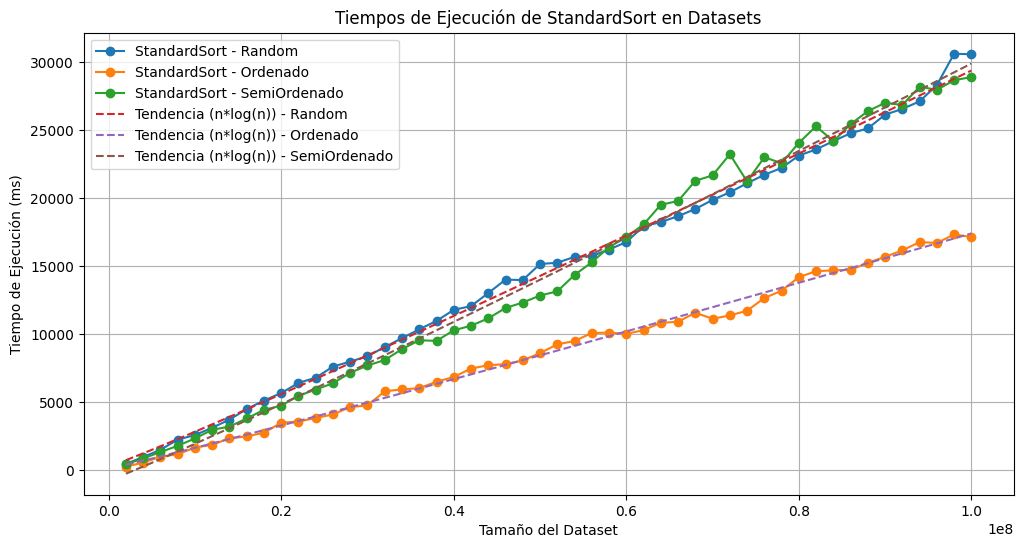

In [23]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función para modelar n*log(n)
def nlogn(x, a, b):
    return a * x * np.log(x) + b

# Preparar datos para ajuste para StandardSort
x_data_random = df['RANDOM'][df['RANDOM'] > 0]
x_data_ordenado = df['ORDENADO'][df['ORDENADO'] > 0]
x_data_semiordenado = df['SEMI_ORDENADO'][df['SEMI_ORDENADO'] > 0]

y_random = df['StandardSort'][df['RANDOM'] > 0]
y_ordenado = df['StandardSort.1'][df['ORDENADO'] > 0]
y_semiordenado = df['StandardSort.2'][df['SEMI_ORDENADO'] > 0]

# Ajustar los modelos para los datos de StandardSort
params_random, _ = curve_fit(nlogn, x_data_random, y_random, maxfev=10000)
params_ordenado, _ = curve_fit(nlogn, x_data_ordenado, y_ordenado, maxfev=10000)
params_semiordenado, _ = curve_fit(nlogn, x_data_semiordenado, y_semiordenado, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para StandardSort en los datasets
plt.plot(x_data_random, y_random, label='StandardSort - Random', marker='o')
plt.plot(x_data_ordenado, y_ordenado, label='StandardSort - Ordenado', marker='o')
plt.plot(x_data_semiordenado, y_semiordenado, label='StandardSort - SemiOrdenado', marker='o')

# Agregar las líneas de tendencia
plt.plot(x_data_random, nlogn(x_data_random, *params_random), label='Tendencia (n*log(n)) - Random', linestyle='--')
plt.plot(x_data_ordenado, nlogn(x_data_ordenado, *params_ordenado), label='Tendencia (n*log(n)) - Ordenado', linestyle='--')
plt.plot(x_data_semiordenado, nlogn(x_data_semiordenado, *params_semiordenado), label='Tendencia (n*log(n)) - SemiOrdenado', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución de StandardSort en Datasets')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## BubbleSort

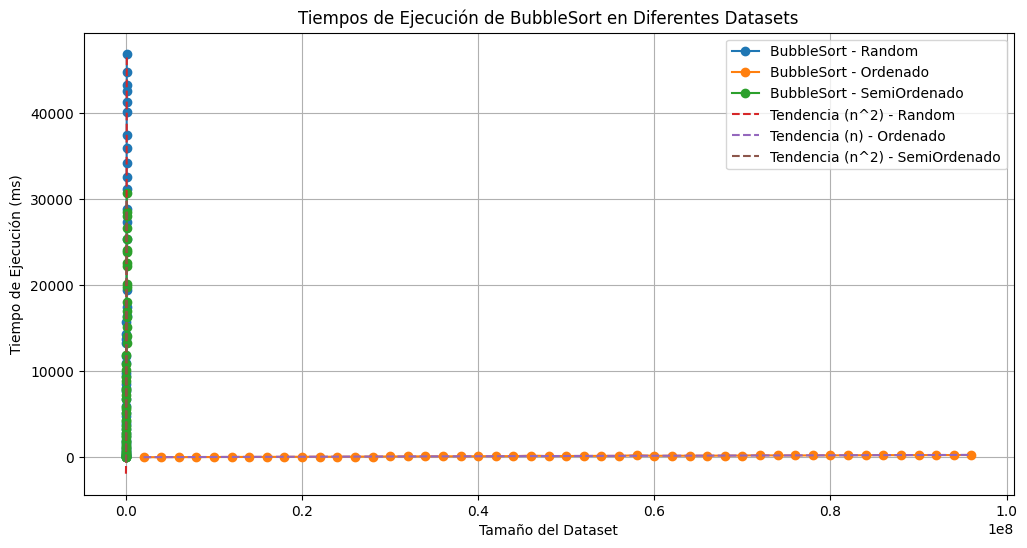

In [25]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Función para modelar n^2 y lineal
def n_squared(x, a, b):
    return a * x**2 + b

def linear(x, a, b):
    return a * x + b

# Filtrar datos que no contengan NaNs o Infs
valid_mask_bs = np.isfinite(df['BubbleSort.1'])  # Crear una máscara para BubbleSort sin infs o NaNs

# Preparar datos filtrados para BubbleSort
x_data_random = df['RANDOM_MALOS'][df['RANDOM_MALOS'] > 0]
x_data_ordenado = df['ORDENADO'][df['ORDENADO'] > 0]
x_data_semiordenado = df['SEMIORDERED_MALO'][df['SEMIORDERED_MALO'] > 0]

y_random = df['BubbleSort'][df['RANDOM_MALOS'] > 0]
y_ordenado = df['BubbleSort.1'][valid_mask_bs & (df['ORDENADO'] > 0)]  # Filtrar los datos de BubbleSort ordenados
y_semiordenado = df['BubbleSort.2'][df['SEMIORDERED_MALO'] > 0]

# Asegurarse de que los datos x e y tengan el mismo tamaño
min_len_random = min(len(x_data_random), len(y_random))
min_len_ordenado = min(len(x_data_ordenado), len(y_ordenado))
min_len_semiordenado = min(len(x_data_semiordenado), len(y_semiordenado))

x_data_random = x_data_random[:min_len_random]
y_random = y_random[:min_len_random]

x_data_ordenado = x_data_ordenado[:min_len_ordenado]
y_ordenado = y_ordenado[:min_len_ordenado]

x_data_semiordenado = x_data_semiordenado[:min_len_semiordenado]
y_semiordenado = y_semiordenado[:min_len_semiordenado]

# Ajustar los modelos para los datos de BubbleSort
params_random, _ = curve_fit(n_squared, x_data_random, y_random, maxfev=10000)
params_ordenado, _ = curve_fit(linear, x_data_ordenado, y_ordenado, maxfev=10000)
params_semiordenado, _ = curve_fit(n_squared, x_data_semiordenado, y_semiordenado, maxfev=10000)

# Crear la figura y establecer tamaño
plt.figure(figsize=(12, 6))

# Graficar los tiempos de ejecución originales para BubbleSort en los datasets
plt.plot(x_data_random, y_random, label='BubbleSort - Random', marker='o')
plt.plot(x_data_ordenado, y_ordenado, label='BubbleSort - Ordenado', marker='o')
plt.plot(x_data_semiordenado, y_semiordenado, label='BubbleSort - SemiOrdenado', marker='o')

# Agregar las líneas de tendencia
plt.plot(x_data_random, n_squared(x_data_random, *params_random), label='Tendencia (n^2) - Random', linestyle='--')
plt.plot(x_data_ordenado, linear(x_data_ordenado, *params_ordenado), label='Tendencia (n) - Ordenado', linestyle='--')
plt.plot(x_data_semiordenado, n_squared(x_data_semiordenado, *params_semiordenado), label='Tendencia (n^2) - SemiOrdenado', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Tiempos de Ejecución de BubbleSort en Diferentes Datasets')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

